# <font color='pink'>Análise de Dados com Linguagem Python</font>

## <font color='pink'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![imagem](Dados_varejo.png)

## Intalando e carregando os pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste projeto:', python_version())


Versão da Linguagem Python usada neste projeto: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

## Carregando e conhecendo os dados

In [3]:
# Carrega o dataset
df_dados = pd.read_csv('dados_varejo.csv')
# Shape
print("Shape:",df_dados.shape)
df_dados.info()

Shape: (9700, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [4]:
# Amostra dos dados
df_dados

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [5]:
# Resumo estatístico das colunas numéricas
df_dados.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [6]:
# Verificando se há registros duplicados
df_dados[df_dados.duplicated()].count()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [7]:
# Verificando de há valores ausentes
df_dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [8]:
print("A cidade com maior valor de venda para a categoria de produtos Office Supplies foi:"
      ,df_dados[df_dados["Categoria"]=="Office Supplies"].groupby("Cidade")['Valor_Venda'].sum().idxmax())

A cidade com maior valor de venda para a categoria de produtos Office Supplies foi: New York City


In [9]:
#Podemos conferir ordenando o resultado
df_dados[df_dados["Categoria"]=="Office Supplies"].groupby(
    "Cidade")['Valor_Venda'].sum().sort_values(ascending=False).head(3)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Name: Valor_Venda, dtype: float64

### Qual o total de vendas por data do pedido?

In [10]:
#Agrupamos por Data_Pedidos, calculamos o total de vendas e ordenamos.
df_data = df_dados.groupby("Data_Pedido")['Valor_Venda'].sum().sort_values(ascending=False)
df_data.head()

Data_Pedido
18/03/2015    28106.716
02/10/2017    18452.972
22/10/2018    15158.877
23/03/2018    14816.068
08/09/2015    14228.428
Name: Valor_Venda, dtype: float64

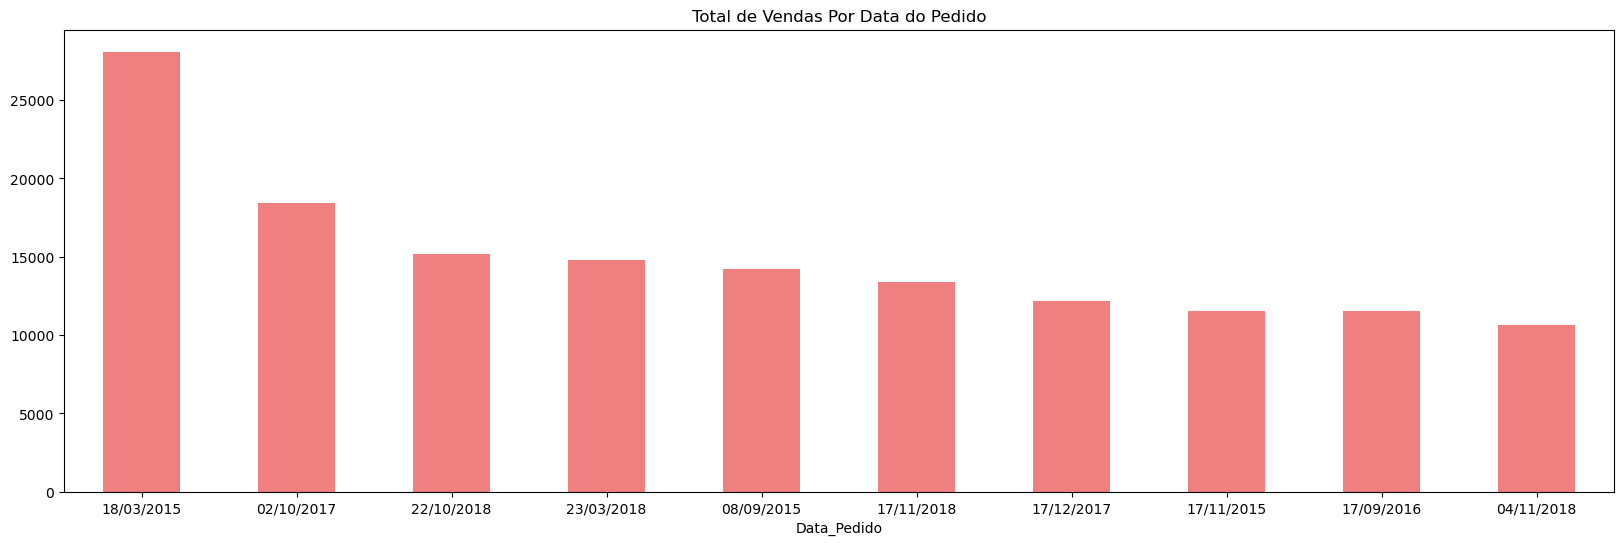

In [11]:
# Plot
plt.figure(figsize = (20, 6))
df_data.head(10).plot(kind='bar',x = 'Data_Pedido', y = 'Valor_Venda', color = 'lightcoral')
plt.title('Total de Vendas Por Data do Pedido')
plt.xticks(rotation = 360)
plt.show()

__Vendas ao longo do tempo__

In [12]:
df_dados["Data"] = pd.to_datetime(df_dados["Data_Pedido"], dayfirst = True)
#Pode-se usar também:
#df_dados["Data"] = df_dados['Data_Pedido'].astype('datetime64[ns]')
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   object        
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
 11  Data          9700 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 909.5+ KB


In [13]:
#Agrupamos por Data e calculamos o total
df_data = df_dados.groupby("Data")['Valor_Venda'].sum()
df_data

Data
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64

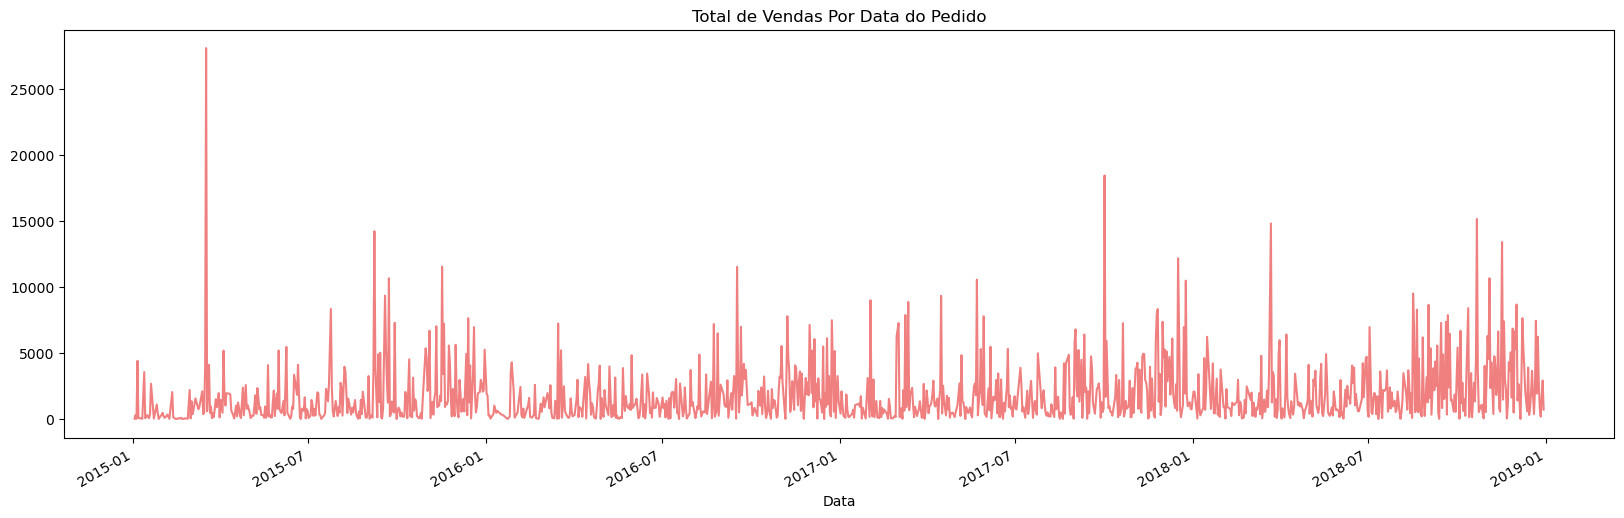

In [14]:
#Plot
plt.figure(figsize = (20, 6))
df_data.plot(x = 'Data', y = 'Valor_Venda', color = 'lightcoral')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

### Qual o total de vendas por estado?

In [15]:
# Agrupamos por estado e calculamos o total de vendas
df_estado = df_dados.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()

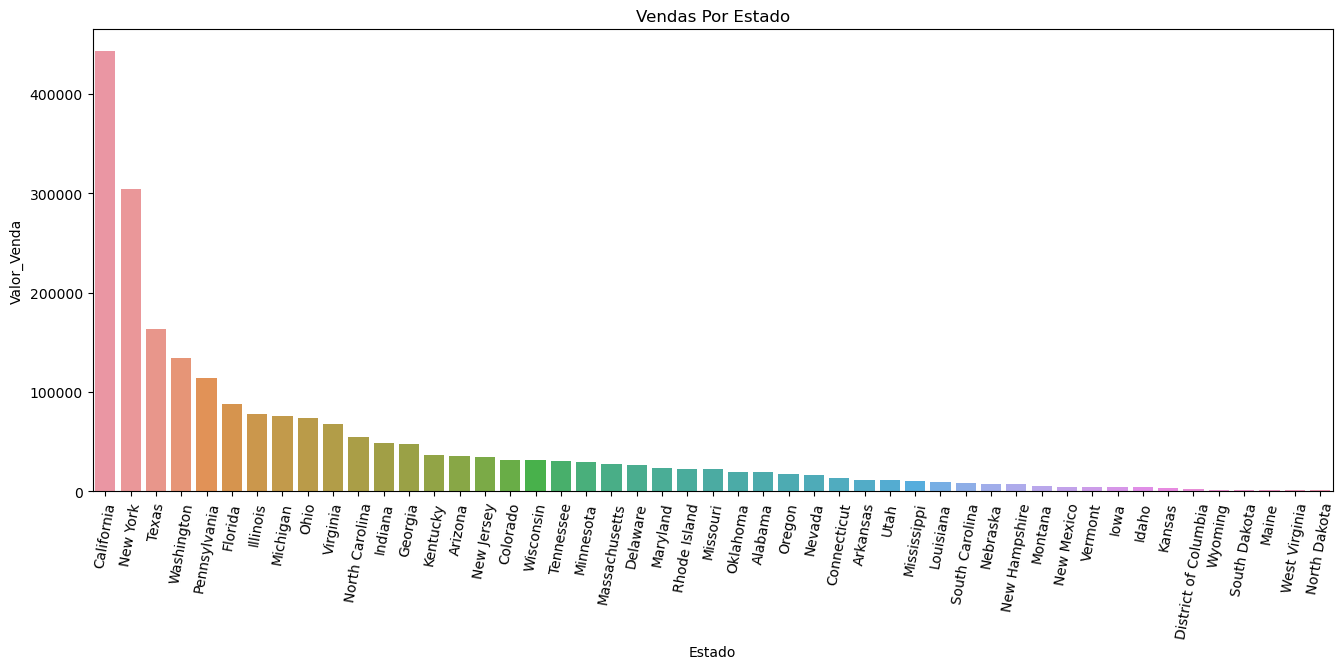

In [16]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = df_estado, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

### Quais são as 10 cidades com maior total de vendas?

In [17]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_cidade = df_dados.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)

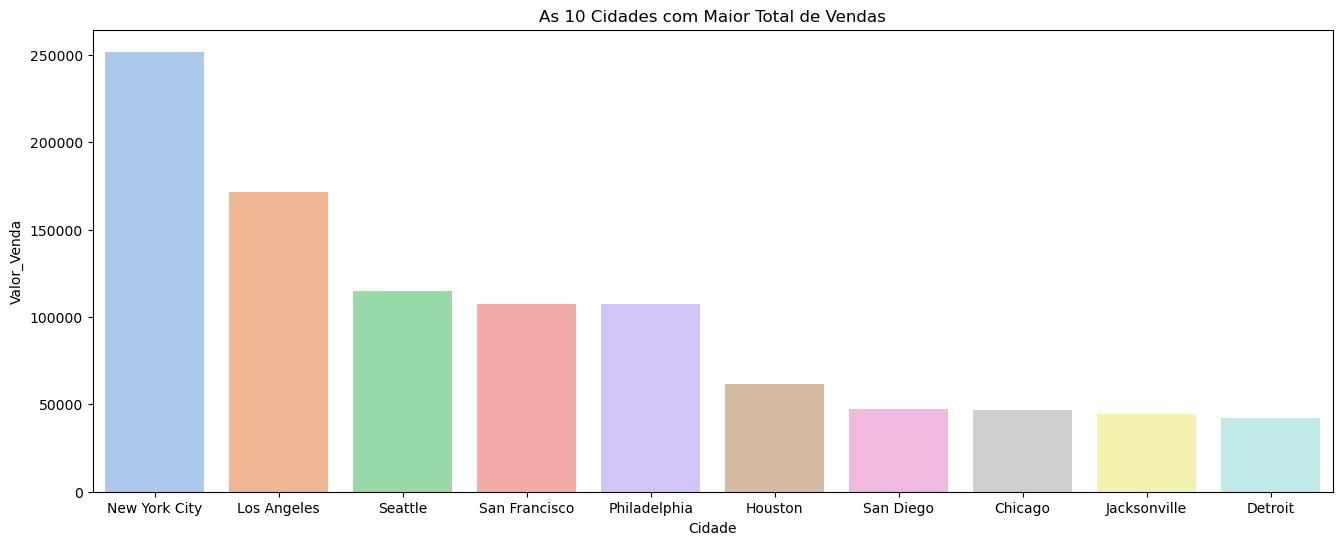

In [18]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = df_cidade, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

### Qual segmento teve o maior total de vendas?

In [19]:
# Agrupamos por segmento e calculamos o total de vendas
df_segmento = df_dados.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)
df_segmento

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


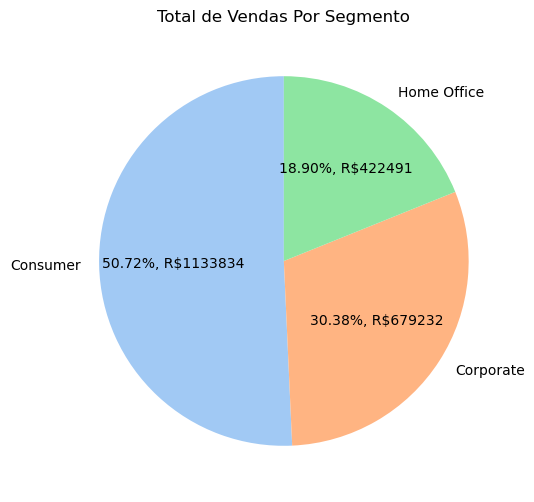

In [20]:
# Plot
plt.figure(figsize = (16, 6))
plt.pie(df_segmento['Valor_Venda'], 
        labels = df_segmento['Segmento'],
        autopct=lambda p:f'{p:.2f}%, R${p*sum(df_segmento.Valor_Venda)/100 :.0f}',
        startangle = 90)
plt.title('Total de Vendas Por Segmento')
plt.show()

### Qual o total de vendas por segmento e por ano?

In [22]:
#Criamos a variável ano extraindo o ano da variável de Data
df_dados['Ano'] = df_dados['Data'].dt.year
df_dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016


In [23]:
# Total de vendas por segmento e por ano
df_seg_ano = df_dados.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()
df_seg_ano 

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


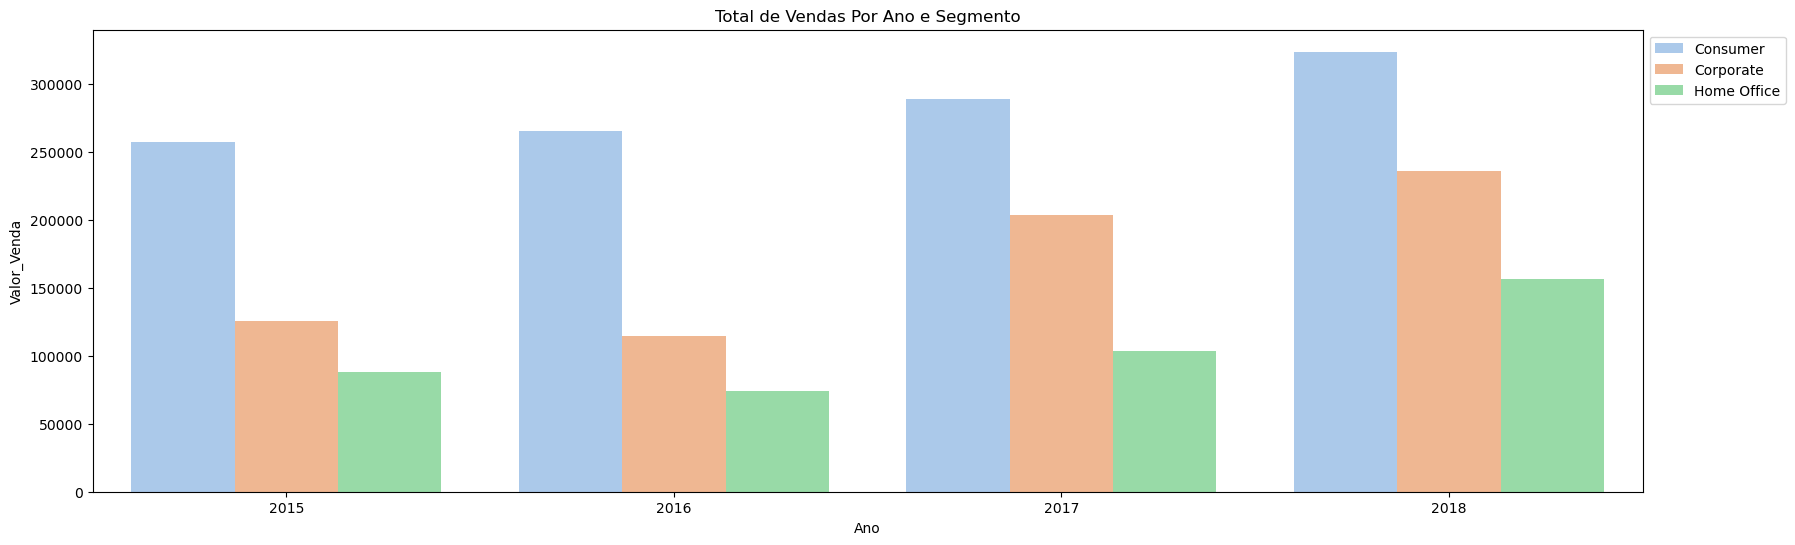

In [38]:
plt.figure(figsize = (20, 6))
sns.barplot(x="Ano",
            y="Valor_Venda",
            hue="Segmento",
            data=df_seg_ano)
plt.title('Total de Vendas Por Ano e Segmento')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()

### Quantas vendas receberiam 15% de desconto?

De acordo com a seguinte regra de desconto, calcule __quantas vendas receberiam 15% de desconto.__
- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
<br/>
<br/>
- __Além disso, qual o valor reduzido na receita total?__

In [24]:
# Cria uma nova coluna de acordo com a regra definida acima
df_dados['Desconto'] = np.where(df_dados['Valor_Venda'] > 1000, 0.15, 0.10)
df_dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Data,Ano,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,0.1


In [25]:
# Total por cada valor da variável
df_dados['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [26]:
#Redução da Receita  das vendas com desconto de 10%
df_dados[df_dados["Desconto"]==0.10].Valor_Venda.sum()*0.10

126817.67831000002

In [27]:
#Redução da Receita das vendas com desconto de 15%
df_dados[df_dados["Desconto"]==0.15].Valor_Venda.sum()*0.15

145107.17574

In [28]:
#Redução da Receita
total_desconto = df_dados["Desconto"]*df_dados["Valor_Venda"]
total_desconto.sum()

271924.85405

>Portanto, 457 vendas receberiam 15% de desconto. Uma redução na receita de R$271.924,85

### Considere que a qmpresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de venda antes e depois do desconto?

In [29]:
df_dados["Valor_Venda_Desconto"] = df_dados["Valor_Venda"]*(1-df_dados["Desconto"])

In [30]:
#Média do Valor de Vendas antes do desconto de 15%
df_dados[df_dados["Desconto"]==0.15].Valor_Venda.mean()

2116.8078153172864

In [31]:
#Média do Valor de Vendas depois do desconto de 15%
df_dados[df_dados["Desconto"]==0.15]["Valor_Venda_Desconto"].mean()

1799.2866430196952

### Qual o média de vendas por segmento, por ano e por mês?

In [32]:
# Extraímos o mês e gravamos em uma nova variável
df_dados['Mes'] = df_dados['Data'].dt.month

In [33]:
df_agg = df_dados.groupby(["Segmento","Ano","Mes"])["Valor_Venda"].mean().reset_index()
df_agg

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,1,146.736787
1,Consumer,2015,2,117.327926
2,Consumer,2015,3,152.170564
3,Consumer,2015,4,189.762750
4,Consumer,2015,5,191.337439
...,...,...,...,...
139,Home Office,2018,8,176.160606
140,Home Office,2018,9,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


<Figure size 1200x600 with 0 Axes>

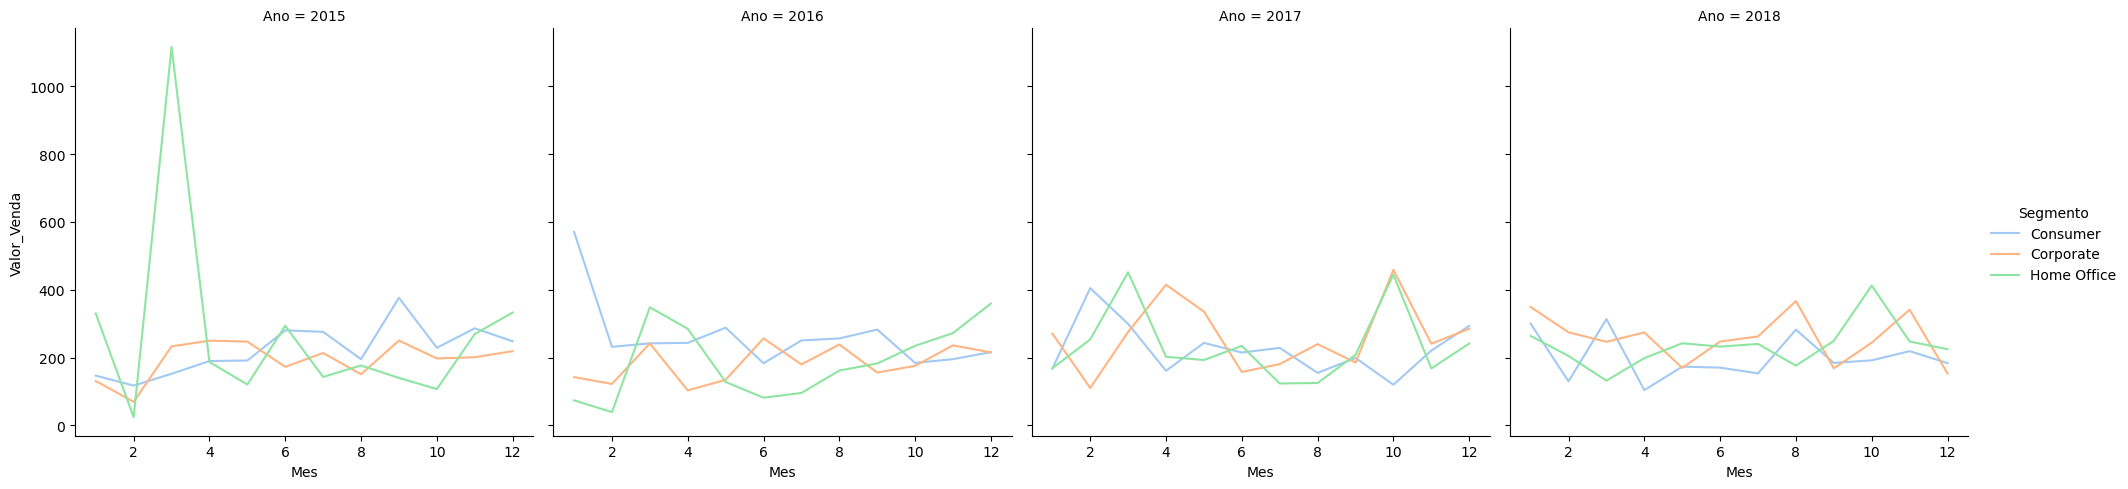

In [34]:
# Plot
plt.figure(figsize = (12, 6))
fig1 = sns.relplot(kind = 'line',
                   data = df_agg,
                   y = 'Valor_Venda', 
                   x = 'Mes',
                   hue = 'Segmento', 
                   col = "Ano",
                   col_wrap = 4)
plt.show()

### Qual o total de vendas por Categoria e SubCategoria, considerando somente as top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [46]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_cat = df_dados[["Categoria","SubCategoria","Valor_Venda"]].groupby(['Categoria',
                             'SubCategoria']).sum().sort_values('Valor_Venda',
                                                                ascending = False).head(12).reset_index()
df_cat

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
2,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
4,Office Supplies,Binders,194723.3810
5,Technology,Machines,189238.6310
6,Technology,Accessories,162791.3620
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,108045.0467
9,Office Supplies,Appliances,104061.6930


In [49]:
df_cat.sort_values(by=["Categoria","Valor_Venda"],ascending = False,inplace=True)
df_cat

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.2940
5,Technology,Machines,189238.6310
6,Technology,Accessories,162791.3620
7,Technology,Copiers,146248.0940
2,Office Supplies,Storage,216188.3620
4,Office Supplies,Binders,194723.3810
9,Office Supplies,Appliances,104061.6930
11,Office Supplies,Paper,76312.7640
1,Furniture,Chairs,317919.6250
3,Furniture,Tables,202083.3600


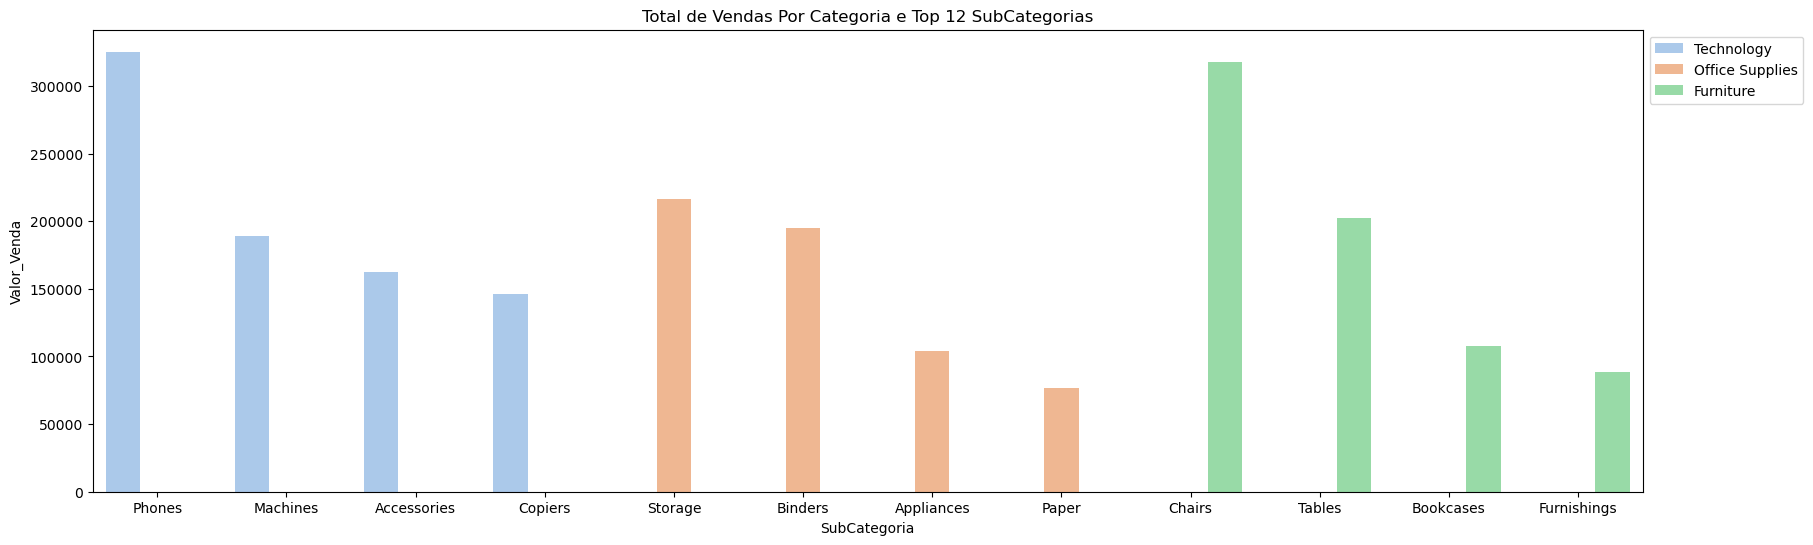

In [50]:
plt.figure(figsize = (20, 6))
sns.barplot(x="SubCategoria",
            y="Valor_Venda",
            hue="Categoria",
            data=df_cat)
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()

# Fim